In [1]:
import os
from pathlib import Path
import fnmatch
import json
import pandas as pd
import re

In [13]:
# for path,dirs,files in os.walk('.\\runs'):
#     for file in fnmatch.filter(files,'all_results.json'):
#         fullname = os.path.abspath(os.path.join(path,file))
        
#         task_name = os.path.basename(path)
#         folder_str = os.path.basename(os.path.dirname(os.path.dirname(fullname))) # move up two folders and get folder name
#         arguments = {}
#         if 'mod' in folder_str:
#             arguments['modded'] = True
#         else:
#             arguments['modded'] = False

#         rr = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", folder_str)
#         arguments["num_train_epochs"] = int(rr[1])
#         arguments["hidden_dropout"] = float(rr[0])

#         # print(arguments)
#         with open(os.path.abspath(os.path.join(path,'used_arguments.json')), "w") as f: 
#             json.dump(arguments,f)
        

IndexError: list index out of range

In [6]:
series_list = []
for path,dirs,files in os.walk('.\\finished_runs'):
    for file in fnmatch.filter(files,'used_arguments.json'):
        with open(os.path.abspath(os.path.join(path,file))) as f:
            d = json.load(f)
            series_list.append(d)
            break

df = pd.DataFrame(series_list)
df

,task_name,train_file,validation_file,max_length,pad_to_max_length,model_name_or_path,use_slow_tokenizer,per_device_train_batch_size,per_device_eval_batch_size,learning_rate,...,checkpointing_steps,resume_from_checkpoint,with_tracking,report_to,ignore_mismatched_sizes,hidden_dropout,train_data_frac,use_pretrain_dropout_in_first_pass,use_modded,eval_accuracy
0,wnli,None,None,128,False,bert-base-cased,False,32,8,0.00005,...,None,None,True,tensorboard,False,0.1,1.0,True,True,0.436620
1,wnli,None,None,128,False,bert-base-cased,False,32,8,0.00005,...,None,None,True,tensorboard,False,0.1,1.0,True,True,0.281690
2,wnli,None,None,128,False,bert-base-cased,False,32,8,0.00005,...,None,None,True,tensorboard,False,0.1,1.0,True,True,0.112676
3,wnli,None,None,128,False,bert-base-cased,False,32,8,0.00005,...,None,None,True,tensorboard,False,0.1,1.0,True,False,0.549296
4,wnli,None,None,128,False,bert-base-cased,False,32,8,0.00005,...,None,None,True,tensorboard,False,0.1,1.0,True,False,0.464789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,rte,None,None,128,False,bert-base-cased,False,32,8,0.00001,...,None,None,True,tensorboard,False,0.8,0.1,False,True,0.451264
428,rte,None,None,128,False,bert-base-cased,False,32,8,0.00001,...,None,None,True,tensorboard,False,0.8,0.1,False,True,0.451264
429,rte,None,None,128,False,bert-base-cased,False,32,8,0.00001,...,None,None,True,tensorboard,False,0.8,0.1,False,False,0.454874
430,rte,None,None,128,False,bert-base-cased,False,32,8,0.00001,...,None,None,True,tensorboard,False,0.8,0.1,False,False,0.451264


In [7]:
keep = [c for c in list(df) if len(df[c].unique()) > 1]
df_small = df[keep]#.drop(["output_dir"],axis=1)
df_small

,output_dir,use_pretrain_dropout_in_first_pass,use_modded,eval_accuracy
0,/content/drive/MyDrive/Masterarbeit/fantastic-...,True,True,0.464789
1,/content/drive/MyDrive/Masterarbeit/fantastic-...,True,False,0.380282
2,/content/drive/MyDrive/Masterarbeit/fantastic-...,False,True,0.408451


In [5]:
df_small.to_csv(".\\runs\\summary.csv")

<Axes: xlabel='hidden_dropout', ylabel='eval_accuracy'>

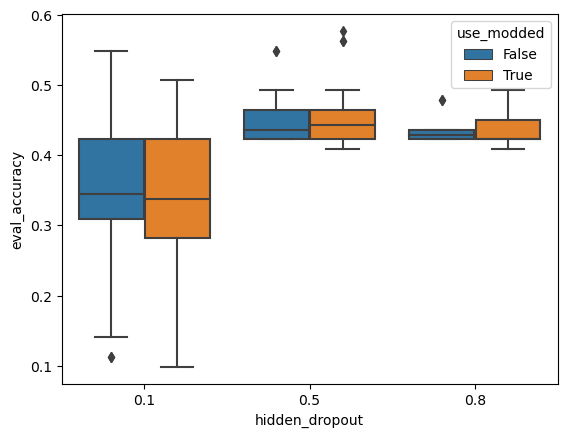

In [43]:
import seaborn as sns
# sns.set_theme(style="ticks", palette="pastel")

# df_plot = df_small
df_plot = df_small.loc[df_small["task_name"]=="wnli",]

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="hidden_dropout", y="eval_accuracy",
            hue="use_modded",
            data=df_plot)
# sns.despine(offset=10, trim=True)

In [44]:
acc_diff = df_small.loc[df_small["use_modded"],"eval_accuracy"].reset_index(drop=True)-df_small.loc[~df_small["use_modded"],"eval_accuracy"].reset_index(drop=True)

df_diff = df_small.loc[df_small["use_modded"],].drop(["eval_accuracy","use_modded"], axis=1).reset_index(drop=True)
df_diff["mod_better"] = acc_diff.apply(lambda x: 1 if x>0 else (0 if x<0 else 0.5))
df_diff["accuracy_diff"] = acc_diff
df_diff

,task_name,learning_rate,num_train_epochs,hidden_dropout,train_data_frac,use_pretrain_dropout_in_first_pass,mod_better,accuracy_diff
0,wnli,0.00005,5,0.1,1.0,True,0.0,-0.112676
1,wnli,0.00005,10,0.1,1.0,True,0.0,-0.183099
2,wnli,0.00005,20,0.1,1.0,True,0.5,0.000000
3,wnli,0.00005,5,0.1,0.5,True,1.0,0.028169
4,wnli,0.00005,10,0.1,0.5,True,0.0,-0.028169
...,...,...,...,...,...,...,...,...
211,rte,0.00001,10,0.8,0.5,False,0.0,-0.010830
212,rte,0.00001,20,0.8,0.5,False,1.0,0.003610
213,rte,0.00001,5,0.8,0.1,False,0.0,-0.010830
214,rte,0.00001,10,0.8,0.1,False,0.5,0.000000


array([[<Axes: title={'center': 'learning_rate'}>,
        <Axes: title={'center': 'num_train_epochs'}>],
       [<Axes: title={'center': 'hidden_dropout'}>,
        <Axes: title={'center': 'train_data_frac'}>],
       [<Axes: title={'center': 'mod_better'}>,
        <Axes: title={'center': 'accuracy_diff'}>]], dtype=object)

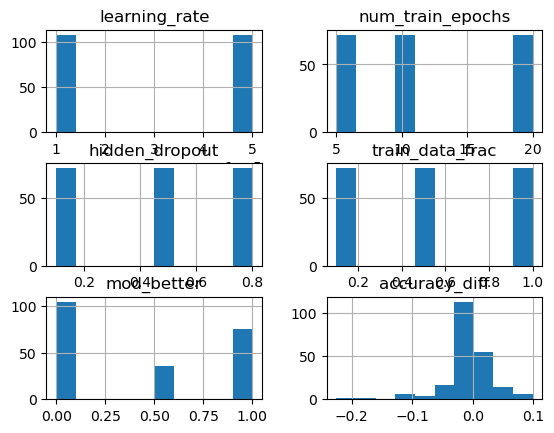

In [64]:
df_diff.hist()

6

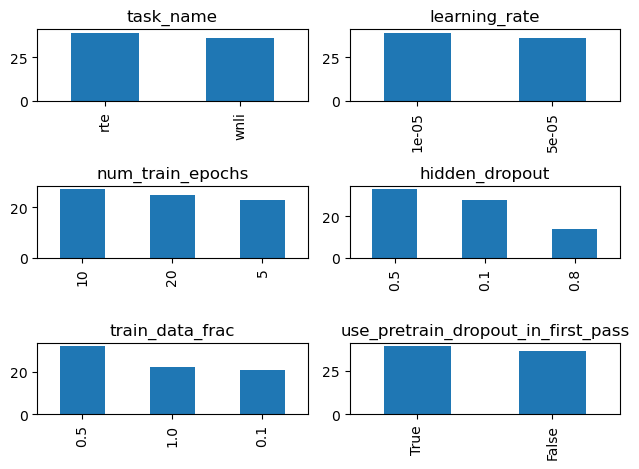

In [76]:
import matplotlib.pyplot as plt
import math
fig, axs = plt.subplots(math.ceil(len(df_diff.columns.drop(["mod_better","accuracy_diff"]))/2),2)
for idx,ax in enumerate(axs.reshape(-1)):
    col = df_diff.columns.drop("accuracy_diff")[idx]
    df_diff.loc[df_diff["mod_better"]==1,col].value_counts().plot.bar(ax=ax)
    ax.set_title(col)

fig.tight_layout()

<Axes: >

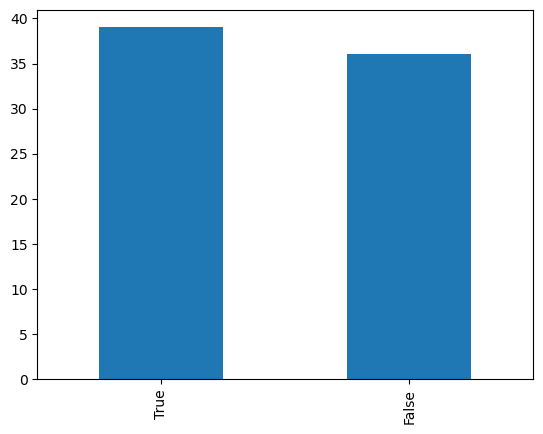

In [59]:

df_diff.loc[df_diff["mod_better"]==1,"use_pretrain_dropout_in_first_pass"].value_counts().plot.bar()

<Axes: >

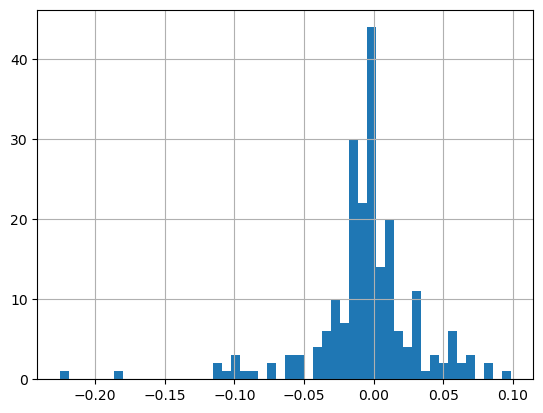

In [52]:
df_diff["accuracy_diff"].hist(bins = 50)

<Axes: xlabel='mod_better', ylabel='accuracy_diff'>

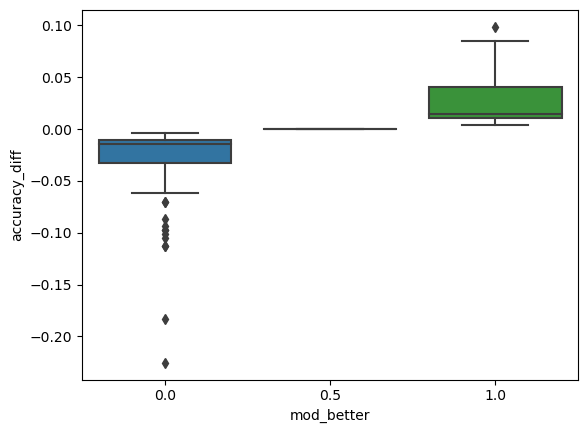

In [50]:
sns.boxplot(x="mod_better", y="accuracy_diff",
            data=df_diff)

In [8]:
import dtale

dtale.show(df_small)

2023-07-12 17:13:48,357 - INFO     - Executing shutdown due to inactivity...
2023-07-12 17:14:00,560 - INFO     - Executing shutdown...
2023-07-12 17:14:00,562 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\Valentin\miniconda3\envs\fantastic-umbrella\lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\Valentin\miniconda3\envs\fantastic-umbrella\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\Valentin\miniconda3\envs\fantastic-umbrella\lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\Valentin\miniconda3\envs\fantastic-umbrella\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\Valentin\miniconda3\envs\fantastic-umbrella\lib\sit

In [18]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


In [19]:
event_acc = EventAccumulator('G:\\Meine Ablage\\Masterarbeit\\fantastic-umbrella\\finished_runs\\02_reference_runs\\run_reference_0_\\glue_no_trainer')
event_acc.Reload()
# Show all tags in the log file
print(event_acc.Tags())

{'images': [], 'audio': [], 'histograms': [], 'scalars': [], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
